<a href="https://colab.research.google.com/github/Sankalpa0011/DCGAN-Handwritten-Digits-Generator/blob/main/Testing_The_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten
from keras.layers import BatchNormalization, LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [7]:
img_rows = 28
img_cols = 28
channels = 1
img_shape = (img_rows, img_cols, channels)
print(img_shape)

(28, 28, 1)


In [10]:
def build_generator():

  noise_shape = (100,)

  model = Sequential()

  model.add(Dense(256, input_shape=noise_shape))
  model.add(LeakyReLU(alpha=0.2))
  model.add(BatchNormalization(momentum=0.8))
  model.add(Dense(512))
  model.add(LeakyReLU(alpha=0.2))
  model.add(BatchNormalization(momentum=0.8))
  model.add(Dense(1024))
  model.add(LeakyReLU(alpha=0.2))
  model.add(BatchNormalization(momentum=0.8))

  model.add(Dense(np.prod(img_shape), activation='tanh'))
  model.add(Reshape(img_shape))

  model.load_weights('/content/drive/MyDrive/DL Projects/DCGAN Handwritten Digits Generator/generator_model.h5')

  model.compile(loss="binary_crossentropy", optimizer=optimizer)

  return model

In [11]:
optimizer = Adam(0.0002, 0.5)

generator = build_generator()

In [12]:
sample_noise = np.random.normal(0, 1, (10000, 100))

print(sample_noise.shape)

(10000, 100)


In [13]:
result = generator.predict(sample_noise)
print(result.shape)

313/313 [==============================] - 1s 3ms/step
(10000, 28, 28, 1)


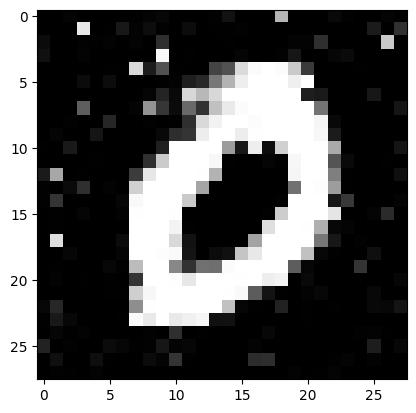

In [20]:
plt.imshow(result[2000].reshape(28, 28), cmap='gray')
plt.show()